# Utilizing Logistic Regression for Classification

# Concept Session

## Demo 4.1: Data Preparation


### 1. Import Data and Python Packages

In [5]:
#first we have to import all relevant Python packages 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# Read CSV train data file into DataFrame
loan_df=pd.read_csv('DS1_C9_S4_Concept_Loan_Data.csv')
loan_df

# preview the data


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [7]:
# shape of the dataset
loan_df.shape

(9578, 14)

In [8]:
# explore the existing data types
loan_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Variable

Dependent: not.fully.paid
    
Independent: credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mnths, delinq.2yrs, pub.rec

### 2. Data Preprocessing 

### a. Setting labels to ordinal types of columns

In [13]:
loan_df['not.fully.paid'].unique()

array([0, 1], dtype=int64)

In [14]:
# Define categories (bins) and labels for not.fully.paid column
bins=[-1,0,1]
labels=['fully paid','not fully paid']

# Convert column to categorical with labels
loan_df['not.fully.paid_c'] = pd.cut(loan_df['not.fully.paid'], bins=bins, labels=labels)

In [15]:
# pd.cut->this line uses pd.cut function from the pandas library to convert values in not fully paid column into the categorical column
# fully paid is 0
# not fully paid is 1

In [16]:
loan_df.dtypes

credit.policy           int64
purpose                object
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
not.fully.paid_c     category
dtype: object

In [17]:
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,not.fully.paid_c
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,fully paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,fully paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,fully paid
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,fully paid
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fully paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,not fully paid
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,not fully paid
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,not fully paid
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,not fully paid


In [18]:
loan_df.dtypes

credit.policy           int64
purpose                object
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
not.fully.paid_c     category
dtype: object

In [19]:
# Define categories (bins) and labels for credit.policy column
bins=[-1,0,1]
labels = ['not approved credit underwriting criteria', 'approved credit underwriting criteria']

# Convert column to categorical with labels
loan_df['credit.policy_c'] = pd.cut(loan_df['credit.policy'], bins=bins, labels=labels)

# not approved credit underwriting criteria:0
# approved credit underwriting criteria:1

In [20]:
loan_df.dtypes

credit.policy           int64
purpose                object
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
not.fully.paid_c     category
credit.policy_c      category
dtype: object

In [21]:
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,not.fully.paid_c,credit.policy_c
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,fully paid,approved credit underwriting criteria
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,fully paid,approved credit underwriting criteria
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,fully paid,approved credit underwriting criteria
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,fully paid,approved credit underwriting criteria
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fully paid,approved credit underwriting criteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,not fully paid,not approved credit underwriting criteria
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,not fully paid,not approved credit underwriting criteria
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,not fully paid,not approved credit underwriting criteria
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,not fully paid,not approved credit underwriting criteria


### b. Label Encoding

In [23]:
loan_df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [24]:
#Encoding purpose variable 
purpose_encoder=preprocessing.LabelEncoder()
purpose_encoder.fit(loan_df['purpose'])
print(purpose_encoder.classes_)
loan_df['purpose_enc']=purpose_encoder.fit_transform(loan_df['purpose'])

['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   object  
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   int64   
 13  not.fully.paid     9578 non-null   int64   
 14  not.fully.paid_c   9578 non-null   category
 15  credit.policy_c    9578 non-null   category
 16  purpos

In [26]:
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,not.fully.paid_c,credit.policy_c,purpose_enc
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,fully paid,approved credit underwriting criteria,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,fully paid,approved credit underwriting criteria,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,fully paid,approved credit underwriting criteria,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,fully paid,approved credit underwriting criteria,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fully paid,approved credit underwriting criteria,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,not fully paid,not approved credit underwriting criteria,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,not fully paid,not approved credit underwriting criteria,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,not fully paid,not approved credit underwriting criteria,2
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,not fully paid,not approved credit underwriting criteria,4


### Data Visualization - Purpose-wise not fully paid rate

In [28]:
loan_df['not.fully.paid_c'].value_counts()

not.fully.paid_c
fully paid        8045
not fully paid    1533
Name: count, dtype: int64

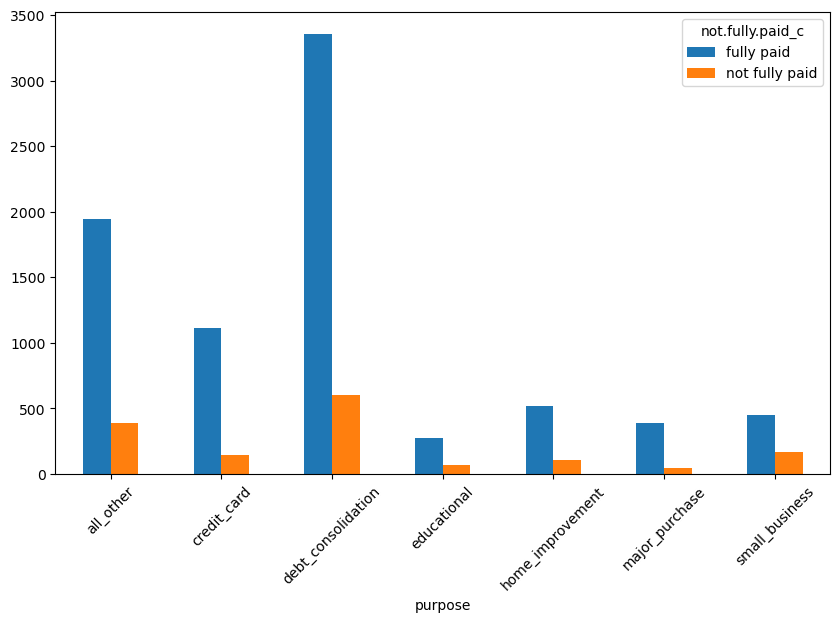

In [29]:
pd.crosstab(loan_df['purpose'],loan_df['not.fully.paid_c']).plot(kind='bar')
plt.gcf().set_size_inches(10,6)
plt.xticks(rotation=45)
plt.show()


### Data Visualization - credit policy wise not fully paid rate

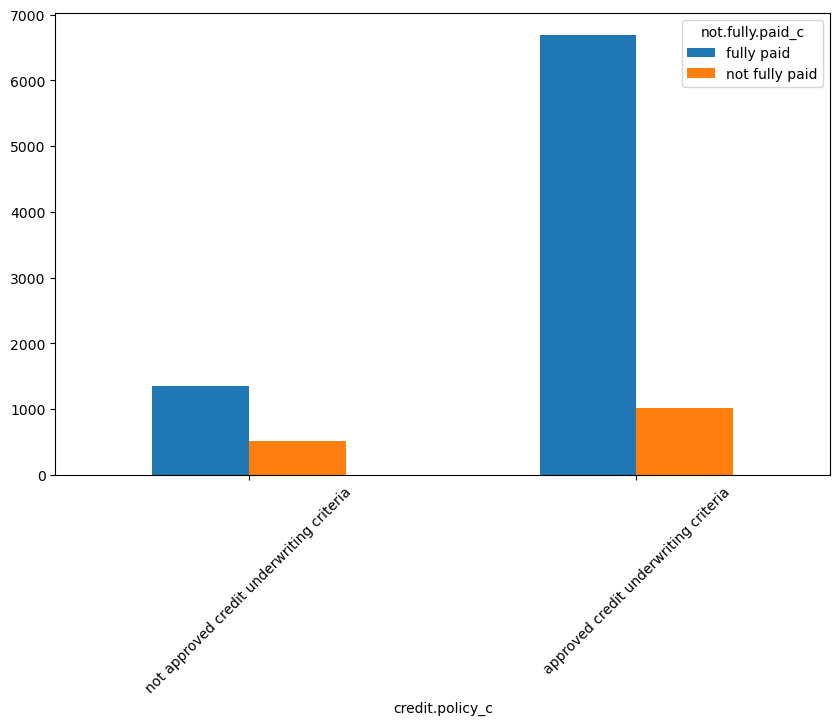

In [31]:
pd.crosstab(loan_df['credit.policy_c'],loan_df['not.fully.paid_c']).plot(kind='bar')
plt.gcf().set_size_inches(10,6)
plt.xticks(rotation=45)
plt.show()

### c. Missing Value Assessment

In [33]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   object  
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   int64   
 13  not.fully.paid     9578 non-null   int64   
 14  not.fully.paid_c   9578 non-null   category
 15  credit.policy_c    9578 non-null   category
 16  purpos

In [34]:
# removing purpose, credit.policy and not.fully.paid columns from the data

columns_to_drop=['purpose','credit.policy_c','not.fully.paid_c']
loan_df=loan_df.drop(columns_to_drop,axis=1)
loan_df


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_enc
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,2
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,4


In [35]:
# check missing values in data
loan_df.isnull().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
purpose_enc          0
dtype: int64

Interpretation:  

In [37]:
# Retrieving credit.policy, not.fully.paid.enc column from the dataset and storing into another dataframe
last_2col_df=loan_df[['credit.policy','not.fully.paid']]
last_2col_df
# Removing credit.policy, not.fully.paid.enc column from the dataset as scaling is not required for this column
new_df=loan_df.drop(['credit.policy','not.fully.paid'],axis=1)
new_df

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,2
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,2
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,2
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,2
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,4


### d. Outlier Assessment and Treatment

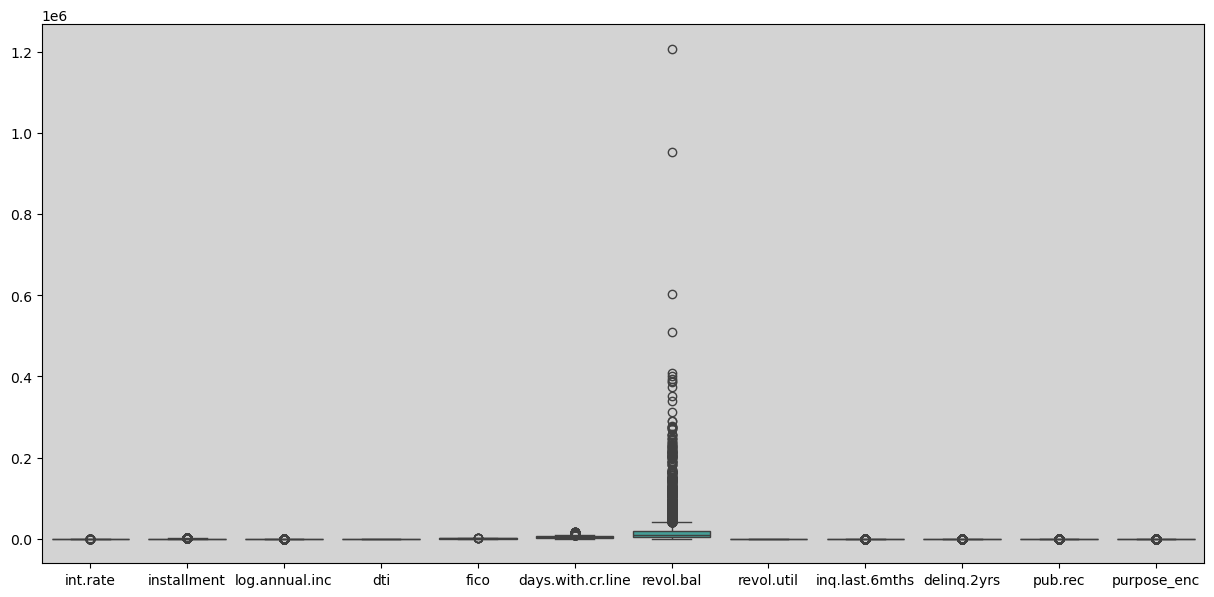

In [39]:
# outlier assessment
sns.boxplot(data=new_df)
plt.gcf().set_size_inches(15,7)
plt.gca().set_facecolor('lightgrey')

#### Outlier Treatment

In [41]:
# treating outliers
def iqr_winsorisation(df,thresh=1.5):
    df_out=df.copy()
    col_to_treat=df_out.columns
    for col in col_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1
        uf=Q3+thresh*IQR
        lf=Q1-thresh*IQR
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out

In [42]:
treated_df=iqr_winsorisation(new_df)
treated_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\2828183542.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '819.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\2828183542.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40843.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1160\2828183542.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc
0,0.1189,829.10000,11.350407,19.48,737.0,5639.958333,28854.00,52.1,0,0,0,2.0
1,0.1071,228.22000,11.082143,14.29,707.0,2760.000000,33623.00,76.7,0,0,0,1.0
2,0.1357,366.86000,10.373491,11.63,682.0,4710.000000,3511.00,25.6,1,0,0,2.0
3,0.1008,162.34000,11.350407,8.10,712.0,2699.958333,33667.00,73.2,1,0,0,2.0
4,0.1426,102.92000,11.299732,14.97,667.0,4066.000000,4740.00,39.5,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76000,12.180755,10.39,672.0,10095.000000,40843.25,82.1,2,0,0,0.0
9574,0.1253,257.70000,11.141862,0.21,722.0,4380.000000,184.00,1.1,5,0,0,0.0
9575,0.1071,97.81000,10.596635,13.09,687.0,3450.041667,10036.00,82.9,5,0,0,2.0
9576,0.1600,351.58000,10.819778,19.18,692.0,1800.000000,0.00,3.2,5,0,0,3.5


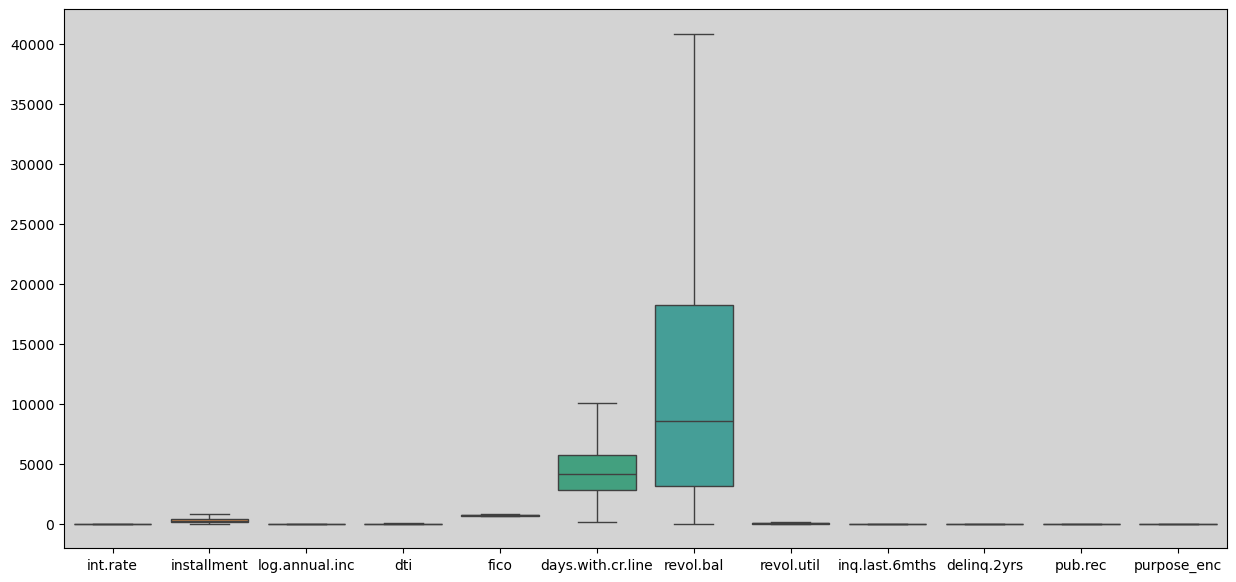

In [43]:
sns.boxplot(data=treated_df)
plt.gcf().set_size_inches(15,7)
plt.gca().set_facecolor('lightgrey')

Interpretation: 

In [45]:
# Outlier assessment to check whether any outlier exists


Interpretation: 

### e. Scaling Data

In [48]:
cols=treated_df.columns
scaler=StandardScaler()
scaled_df=scaler.fit_transform(treated_df)
scaled_df=pd.DataFrame(scaled_df,columns=cols)
scaled_df

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc
0,-0.138372,2.490699,0.718364,0.998505,0.688991,0.502853,1.318657,0.182704,-0.904980,0.0,0.0,0.266109
1,-0.580014,-0.439419,0.258258,0.244540,-0.101264,-0.756970,1.707859,1.030602,-0.904980,0.0,0.0,-0.568603
2,0.490407,0.236642,-0.957167,-0.141885,-0.759809,0.096048,-0.749605,-0.730683,-0.263009,0.0,0.0,0.266109
3,-0.815806,-0.760674,0.718364,-0.654697,0.030445,-0.783235,1.711450,0.909966,-0.263009,0.0,0.0,0.266109
4,0.748655,-1.050429,0.631452,0.343326,-1.154936,-0.185667,-0.649305,-0.251586,-0.904980,0.0,0.0,-0.568603
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.879651,0.128874,2.142515,-0.322023,-1.023227,2.451688,2.297109,1.216726,0.378963,0.0,0.0,-1.403316
9574,0.101163,-0.295663,0.360684,-1.800898,0.293863,-0.048309,-1.021124,-1.575135,2.304878,0.0,0.0,-1.403316
9575,-0.580014,-1.075347,-0.574448,0.070213,-0.628100,-0.455115,-0.217094,1.244300,2.304878,0.0,0.0,0.266109
9576,1.399891,0.162131,-0.191729,0.954924,-0.496391,-1.176917,-1.036140,-1.502753,2.304878,0.0,0.0,1.518178


In [49]:
# Append the credit.policy and  not.fully.paid columns to the scaled DataFrame

scaled_df=pd.concat([scaled_df,last_2col_df],axis=1)
scaled_df

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc,credit.policy,not.fully.paid
0,-0.138372,2.490699,0.718364,0.998505,0.688991,0.502853,1.318657,0.182704,-0.904980,0.0,0.0,0.266109,1,0
1,-0.580014,-0.439419,0.258258,0.244540,-0.101264,-0.756970,1.707859,1.030602,-0.904980,0.0,0.0,-0.568603,1,0
2,0.490407,0.236642,-0.957167,-0.141885,-0.759809,0.096048,-0.749605,-0.730683,-0.263009,0.0,0.0,0.266109,1,0
3,-0.815806,-0.760674,0.718364,-0.654697,0.030445,-0.783235,1.711450,0.909966,-0.263009,0.0,0.0,0.266109,1,0
4,0.748655,-1.050429,0.631452,0.343326,-1.154936,-0.185667,-0.649305,-0.251586,-0.904980,0.0,0.0,-0.568603,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.879651,0.128874,2.142515,-0.322023,-1.023227,2.451688,2.297109,1.216726,0.378963,0.0,0.0,-1.403316,0,1
9574,0.101163,-0.295663,0.360684,-1.800898,0.293863,-0.048309,-1.021124,-1.575135,2.304878,0.0,0.0,-1.403316,0,1
9575,-0.580014,-1.075347,-0.574448,0.070213,-0.628100,-0.455115,-0.217094,1.244300,2.304878,0.0,0.0,0.266109,0,1
9576,1.399891,0.162131,-0.191729,0.954924,-0.496391,-1.176917,-1.036140,-1.502753,2.304878,0.0,0.0,1.518178,0,1


In [50]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int.rate           9578 non-null   float64
 1   installment        9578 non-null   float64
 2   log.annual.inc     9578 non-null   float64
 3   dti                9578 non-null   float64
 4   fico               9578 non-null   float64
 5   days.with.cr.line  9578 non-null   float64
 6   revol.bal          9578 non-null   float64
 7   revol.util         9578 non-null   float64
 8   inq.last.6mths     9578 non-null   float64
 9   delinq.2yrs        9578 non-null   float64
 10  pub.rec            9578 non-null   float64
 11  purpose_enc        9578 non-null   float64
 12  credit.policy      9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 1.0 MB


### f. Checking Multicollinearity among independent variables for final feature selection

#### Which value should represent high multicollinearity? 

In data science industry (depending on business strategy), the mostly used cutoff value ranges from 0.7 to 0.8.   
For example, if the cutoff value is 0.7 which means if two features have a correlation value of 0.7 or above, one of the features will be ignored.

The next question is, which feature should be ignored or selected out of the two highly correlated features?   
Answer: The feature that has high correlation with the dependent variable should be selected.   

In [53]:
# Selecting the cutoff value as 0.7
# ignored the dependent column for scaling
abs(scaled_df.corr())>0.7

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc,credit.policy,not.fully.paid
int.rate,True,False,False,False,True,False,False,False,False,False,False,False,False,False
installment,False,True,False,False,False,False,False,False,False,False,False,False,False,False
log.annual.inc,False,False,True,False,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,True,False,False,False,False,False,False,False,False,False,False
fico,True,False,False,False,True,False,False,False,False,False,False,False,False,False
days.with.cr.line,False,False,False,False,False,True,False,False,False,False,False,False,False,False
revol.bal,False,False,False,False,False,False,True,False,False,False,False,False,False,False
revol.util,False,False,False,False,False,False,False,True,False,False,False,False,False,False
inq.last.6mths,False,False,False,False,False,False,False,False,True,False,False,False,False,False
delinq.2yrs,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

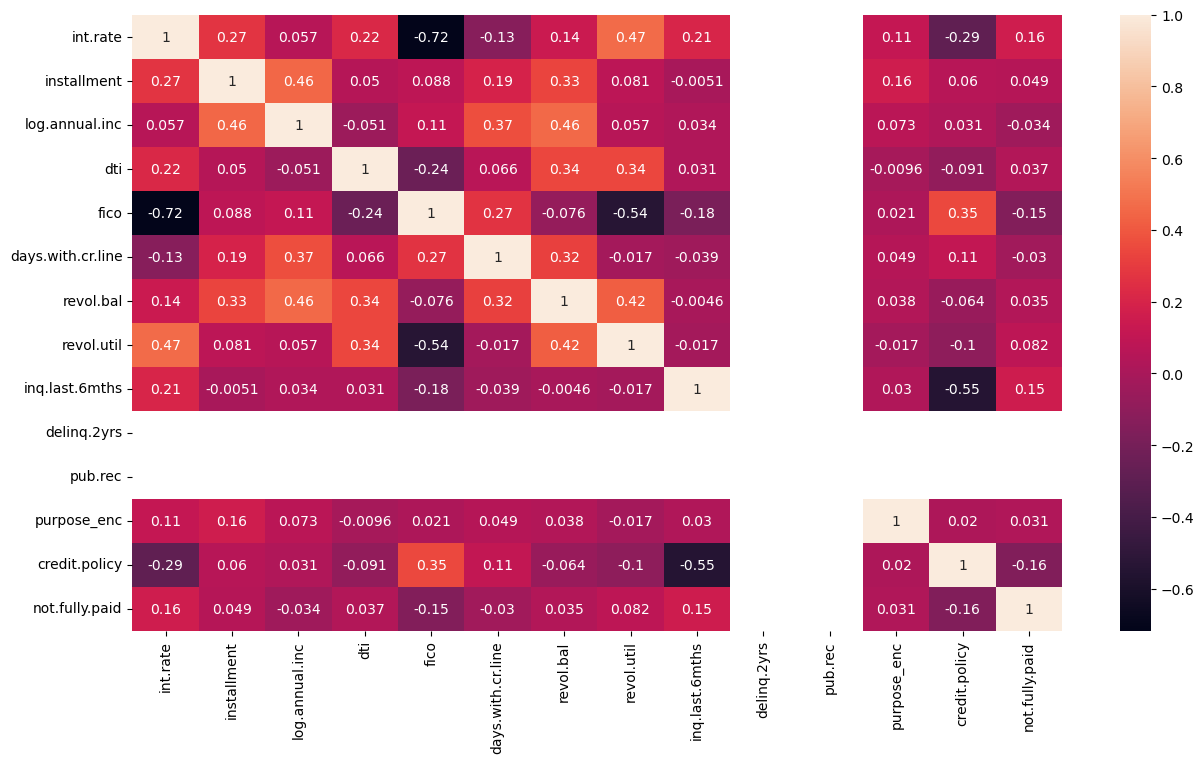

In [54]:
# Plotting heatmap
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(scaled_df.corr(),annot=True)


In [55]:
# Dropping 'fico' column


In [56]:
scaled_df=scaled_df.drop(['fico'],axis=1)
scaled_df

,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_enc,credit.policy,not.fully.paid
0,-0.138372,2.490699,0.718364,0.998505,0.502853,1.318657,0.182704,-0.904980,0.0,0.0,0.266109,1,0
1,-0.580014,-0.439419,0.258258,0.244540,-0.756970,1.707859,1.030602,-0.904980,0.0,0.0,-0.568603,1,0
2,0.490407,0.236642,-0.957167,-0.141885,0.096048,-0.749605,-0.730683,-0.263009,0.0,0.0,0.266109,1,0
3,-0.815806,-0.760674,0.718364,-0.654697,-0.783235,1.711450,0.909966,-0.263009,0.0,0.0,0.266109,1,0
4,0.748655,-1.050429,0.631452,0.343326,-0.185667,-0.649305,-0.251586,-0.904980,0.0,0.0,-0.568603,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.879651,0.128874,2.142515,-0.322023,2.451688,2.297109,1.216726,0.378963,0.0,0.0,-1.403316,0,1
9574,0.101163,-0.295663,0.360684,-1.800898,-0.048309,-1.021124,-1.575135,2.304878,0.0,0.0,-1.403316,0,1
9575,-0.580014,-1.075347,-0.574448,0.070213,-0.455115,-0.217094,1.244300,2.304878,0.0,0.0,0.266109,0,1
9576,1.399891,0.162131,-0.191729,0.954924,-1.176917,-1.036140,-1.502753,2.304878,0.0,0.0,1.518178,0,1


Interpretation:
    
Correlation absolutes values of 'fico' with 'int.rate' variable to each other are high (>0.70), so dropping 'fico' variable.

## Demo 4.2: Logistic Regression 

### 1. Preparation of training and test datasets

In [60]:
80/100*9578

7662.400000000001

In [61]:
#Creating test and training datasets
loan_train,loan_test=train_test_split(scaled_df,train_size=0.8,random_state=200)
print(loan_train.shape)
print(loan_test.shape)

(7662, 13)
(1916, 13)


In [62]:
X_train=loan_train.drop(columns='not.fully.paid',axis=1)
y_train=loan_train['not.fully.paid']

X_test=loan_test.drop(columns='not.fully.paid',axis=1)
y_test=loan_test['not.fully.paid']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7662, 12)
(7662,)
(1916, 12)
(1916,)


### 2. Training the model

In [64]:
# Logistic Regression - training the model

logreg=LogisticRegression().fit(X_train,y_train)
# Using the trained model to predict the outcome of the X_Test dataset
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Demo 4.3: Model Evaluation

### 1. Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix # the confusion_matrix is a table that helps visaulize the performnace of classification model.
print(confusion_matrix(y_test,y_pred))
# the function calculates the number of correctly and incorrectly classified instances for each class and returns the resulting confusion matrix


[[1572    1]
 [ 342    1]]


In [68]:
tn,fp,fn,tp =confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)
# this is again calculates the confusion_matrix as before but this time .ravel() function method flatten the resulting resultant matrix into one dimmenson array
# tn-True Negavtives(mean correctly classified as negative)
# fp:False positive(means incorectly classified as positive)
# fn:False Negative(incorrectly classified as neagtive)
# tp:True Positive(mean correctly classified as positive)
# 

1572 1 342 1


# summary:
1.the code calculates the confusion_matrix to evaluate the performnace of classification model
2.ravel()method then unpacks the confusion_matrix into seperate variables represnting True_negative(TN),False positive(FP),False negative(FN),True Negative(TN)
3.then finally it prints the entire confusion_matrix and individual values for the further analysis



In [70]:
# True Positives:red apple and strawberries correctly identifies as red (both predictions and actual color are red)
# False positive:prediction is red actually it is not red here it is mismatch.here the model is mistakenly classifed as red but actally it is not red
# False negative:prediction not red actually it is red
# True Negative:both prediction and actual color not red 

# by analysing the values of TP,FP,FM,TN you can draw conclusion aboth the model strength and weakness.
# High TN and TP : this suggests that the model is performing overall,correclty classifying in both +ve and -ve categories
# High FN:this suggests the model is missing the instances that actually belongs to the +ve class
# Hig FP: this indicates the model might be over predicting the +ve class.its to eager to classify things as +ve leading to false alarms

# 1.1572 is true negative it indictaes the model has high number of true negatives which is good,however it also have high number of false neagative which means it is not good at identifying positive instances.
# 2.6 false positive:

### 2. ROC-AUC

In [72]:
# ROC Score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))


recall_score: 0.0029154518950437317
f1_score: 0.005797101449275362
accuracy_score: 0.8209812108559499
precision_score: 0.5


In [73]:
precision_score:it calculates the precision matrix which measures the propotion of predicted positive instances that were actually positive.
0.5(50%) indictaes the very few instances predicted as positive by the model where actually positive.

recall_score:it calculates the recall matrix ,which measures the proportion of actual positive instances correctly predicted as positive.
0.009 indicates the model correctly predicted the very small proportion (less than the 1 percent of the actual positive instances)
F1_score:0.01775 a low f1_score suggest the imbalance between precision and recall,indicating the model is not performing well inter terms of both.
Accuracy: it calcuklates the overall accuracy of the model by measuring the proportion of correctly predicted instances out od the instances 0.826,this 
suggest that model correctly predicted the class  around 82% of the instances in the test set.


overall conclusion:
overall the model appears to have a decent accuracy but performs poorly in terms of the recall,f score and precision
- so this suggests that the model is primarly predicting the negative class and struggling to identify the positive instances

SyntaxError: invalid syntax (3714323396.py, line 1)

In [74]:
# ROC curve
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print(roc)

0.6439497422799835


In [ ]:
X_test

In [ ]:
logreg.predict_proba(X_test)[:,1]----> it generates the predicted probabilities for each class positive and neagtive for the test data(X_test).
[:,1]: this extracts the probability of positive class

roc_auc_score: this function calculates the roc,auc score using the actual y label test(y_test) and the predicted probabilities of the positive class.

0.6937:it indicates the model's ability  to distinguish b/w +ve and -ve class but it is not a perfect classifier.

In [76]:

from sklearn.metrics import RocCurveDisplay



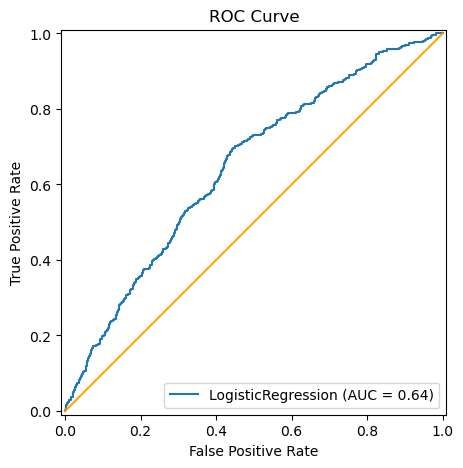

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Example of how to use RocCurveDisplay correctly
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

# Plot a diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='orange', linestyle='-')

# Adjust the figure size and display the plot
plt.gcf().set_size_inches(7, 5)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


- x axis (false positive rate) this represents the proportion of negative instances that are incorrectly predicted as positive
- y axis (true postive rate) this represents the proportion of positive instances that are correctly predicted as positive

- this curve is the roc curve for the logistic regression model ideally we want the curve to be close to the top left corner as possible this indicates high true positive rate and low false positive rate
- this diagonal line represents the performance of random classifier a model that performs better than better than a random classifier should have an roc curve that lies above the diagonal
- auc is area under the curve
- AUC is provided in the legend 0.67 this value indicates the models overall performance a higher auc generally indicates a better discrimination between pos and neg classes

### 3. Final Interpretation:



- overall performance: accuracy(0.82) the model appears to have decent accuracy in classifying churned and not churned overall however accuracy alone can be misleading so we need to consider other metrices
- Specific class performance( churned customer - 0.003) this is the major concern recall meansures the model ability to identify true positives(churned customers). an extremely low recall suggests that the model misses a very high proportion of churned customers.
- this means the model might not be suitable for effectively identify potential churned risk.
- precision(0.5)it tells you the proportion of positive prediction(identified churn) that are actually correct
- a value of 0.5 indicates 50% of the customer flaged as would actually churn
- this isnt necessarly bad on its own but in combination with low recall it suggests the model might be generating many false positives (it means identifing non churned customers as churned)
- f1_score(0.005) this metric combines precision and recall and it is very low value(0.005) reinforce the issues highlighted above . thhe model struggles to correctly classifies the churned customers which is crucial for credit risk assessment
- ROC_score while not ideal, a score of 0.64 on the roc curve indicates some ability to distinguish between churned and non churned customers , however it still closer to the random guessing(0.5) than perfect performance(1.0)

# Key takeaways

- A) the model accuracy might seem acceptable at first glance, but extremely low recall and f1 score reveal a critical weakness in identifying a churned customer this is a significant issue, especially for credit risk assessment where missing churned customers can lead to financial losses
- B) the precision of 0.5 suggests that while the model might flag some true churned customers, it also generates many false positives. this can be misleadinng and require manual interventions to sort out true positive and false alarms.
- C) the roc score further emphasizes the models overall performance being somewhat better than the random chance,but still with significant room for improvement
# Recomendation:
- Look for potential problems with the data used to train the model. Imbalance class distribution (eg: significantly fewer churned customers compared to non churned customers) can lead to models that prioritize the majority class and perform poorly in the minority class( churned customer in this case)
# NOTE:
-  Recomendation highlights the problems of imbalanced class distir this means that in the training data there might be significantly larger number of customers who didn't churn(non churned) compared to those who did churned(churned).
- when a model is trained on a imbalanced data,it can become biased towards the majority class(non churned customers). this can lead to several issues
- 1) poor performance on the minority class:
   the model might not be able to accurately predict churned events because it has seen for fewer examples of churned in the training data. this results in a high number of false negaatives,where the model incorrectly predicts that a customer will not churn when they actuallly will.
- 2) over fitting: 
   the model might overfit to the majority class,meaning it performs well on the training data but poorly new and unseen data Tis is because the model has learned to memorise the majority class pattern but struggle to generalise the minority class.


# Recomendation
To address this issue several techniques can be employed such as 
- Resampling: 
    * over sampling - increase the no. of samplings in the minority class(churned customers)by creating duplicates or using tech like SMOTE(Synthetic Minority Over Sampling Technique)
    * under sampling - reduce the number of samples in the majority class (non churned customers) by randomly removing instances
- Weighted loss function: assign higher weights to the minortiy class during model training to give it to more importance
- Ensemble method: combine multiple models trained on diff subsets of the data or with diff sampling technique to improve overall performance.